In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path ini sesuai dengan lokasi dataset di Google Drive
dataset_path = '/content/drive/My Drive/NativeCNN/Dataset'

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
image_size = (256, 256)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Data generator untuk training dan validasi
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1179 images belonging to 8 classes.
Found 289 images belonging to 8 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output sesuai jumlah kelas
])

# Ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,256 (13.17 MB)

 Trainable params: 3,453,256 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=80,
    validation_data=validation_generator
)

Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 438s 10s/step - accuracy: 0.2127 - loss: 2.0208 - val_accuracy: 0.3910 - val_loss: 1.6716
Epoch 2/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 262s 7s/step - accuracy: 0.3955 - loss: 1.6147 - val_accuracy: 0.3772 - val_loss: 1.5927
Epoch 3/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 266s 7s/step - accuracy: 0.4308 - loss: 1.4962 - val_accuracy: 0.4152 - val_loss: 1.4291
Epoch 4/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 314s 7s/step - accuracy: 0.4628 - loss: 1.3872 - val_accuracy: 0.4844 - val_loss: 1.3445
Epoch 5/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 264s 7s/step - accuracy: 0.5407 - loss: 1.2224 - val_accuracy: 0.5121 - val_loss: 1.2944
Epoch 6/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 314s 7s/step - accuracy: 0.5501 - loss: 1.1255 - val_accuracy: 0.5744 - val_loss: 1.0691
Epoch 7/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.5879 - loss: 1.0730 - val_accuracy: 0.6782 - val_loss: 1.0070
Epoch 8/80
37/37 ━━━━━━━━━━━━━━━━━━━━ 313s 7s/step - accuracy: 0.6557 - loss: 0.9447 - val_accuracy: 0.5744 - val_loss: 1

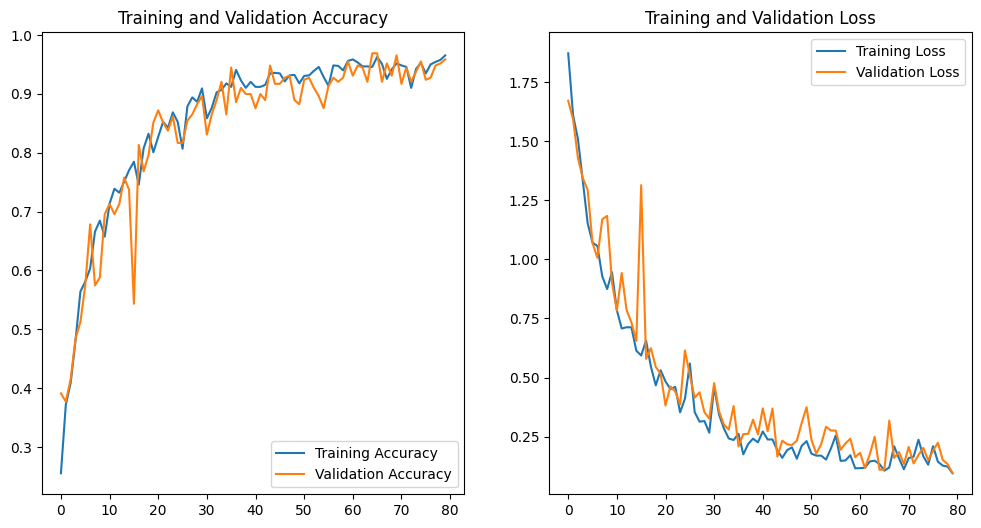

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/cnn80.h5')

In [ ]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}')
print(f'Validation accuracy: {validation_accuracy}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9746 - loss: 0.0824
Validation loss: 0.09448425471782684
Validation accuracy: 0.9723183512687683


In [ ]:
import tensorflow as tf

model_path = "/content/drive/My Drive/cnn80.h5"

tflite_model_path = "/content/cnn80.tflite"

model = tf.keras.models.load_model(model_path)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpctdr_ej5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  135975222940368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975222945296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975223010128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975223006080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975447880352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975224064512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975222252416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975222249072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975224294768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975207967856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135975222880816

In [ ]:
files.download('cnn80.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>